In [10]:
!pip install librosa

In [44]:
import os
import matplotlib.pyplot as plt
import pandas as pd
#for loading and visualizing audio files
import librosa as lr
import librosa.display
import numpy as np


SOUND_DIR = "./Lesser-wav/"
audio_clips = os.listdir(audio_fpath)
print("No. of .MP3 files in audio folder = ",len(audio_clips))

No. of .MP3 files in audio folder =  150


In [26]:
#to play audio
# import IPython.display as ipd
# ipd.display(ipd.Audio(SOUND_DIR))

In [48]:
signal, sr = librosa.load(audio_fpath+audio_clips[85],duration=3)  # sr = sampling rate//3 sec split
print(type(signal), type(sr))
print(signal.shape, sr)

<class 'numpy.ndarray'> <class 'int'>
(66150,) 22050


In [ ]:
#    :param x: time series data (e.g. audio signal), ideally length matches nfft
#    :param win: window function to be applied (e.g. Hanning window). in this case win expects already data points of the window to be provided.
#    :param Fs: sampling frequency (unused)
#    :param nfft: number of bins for FFT (ideally matches length of x)
#    :return: Periodogram power spectrum (np.array)

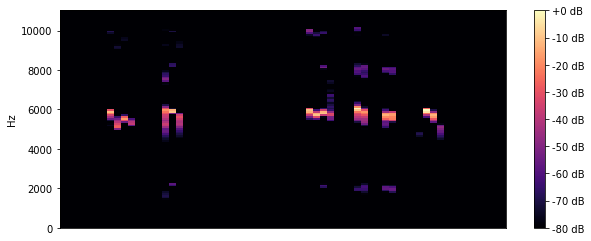

In [39]:
# Plot mel-spectrogram
N_FFT = 1024         
HOP_SIZE = 1024       
N_MELS = 128            
WIN_SIZE = 1024      
WINDOW_TYPE = 'hann' 
FEATURE = 'mel'      
FMIN = 1400 

S = librosa.feature.melspectrogram(y=signal,sr=sr,
                                    n_fft=N_FFT,
                                    hop_length=HOP_SIZE, 
                                    n_mels=N_MELS, 
                                    htk=True, 
                                    fmin=FMIN, 
                                    fmax=sr/2) 

plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(S**2,ref=np.max), fmin=FMIN,y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.show()

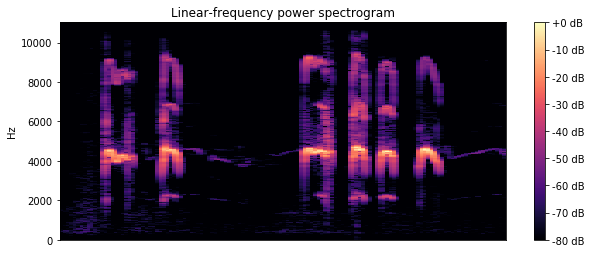

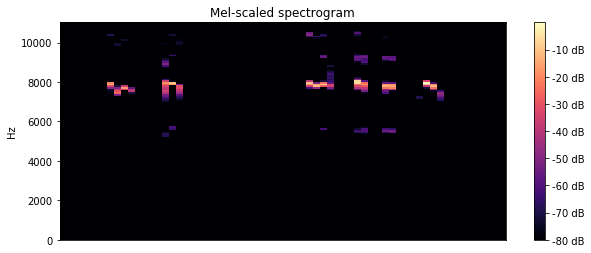

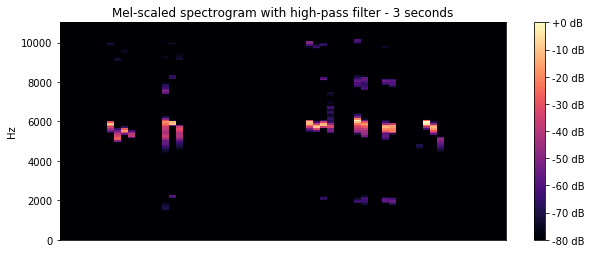

In [42]:
# Plot spectogram
plt.figure(figsize=(10, 4))
D = librosa.amplitude_to_db(np.abs(librosa.stft(signal)), ref=np.max)
librosa.display.specshow(D, y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram')
plt.show()

# Plot mel-spectrogram
N_FFT = 1024         
HOP_SIZE = 1024       
N_MELS = 128            
WIN_SIZE = 1024      
WINDOW_TYPE = 'hann' 
FEATURE = 'mel'      
FMIN = 0 

S = librosa.feature.melspectrogram(y=signal,sr=sr,
                                    n_fft=N_FFT,
                                    hop_length=HOP_SIZE, 
                                    n_mels=N_MELS, 
                                    htk=True, 
                                    fmin=FMIN, 
                                    fmax=sr/2) 

plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(S**2,ref=np.max), fmin=FMIN,y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-scaled spectrogram')
plt.show()

# Plot mel-spectrogram with high-pass filter
N_FFT = 1024         
HOP_SIZE = 1024       
N_MELS = 128            
WIN_SIZE = 1024      
WINDOW_TYPE = 'hann' 
FEATURE = 'mel'      
FMIN = 1400 

S = librosa.feature.melspectrogram(y=signal,sr=sr,
                                    n_fft=N_FFT,
                                    hop_length=HOP_SIZE, 
                                    n_mels=N_MELS, 
                                    htk=True, 
                                    fmin=FMIN, 
                                    fmax=sr/2) 

plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(S**2,ref=np.max), fmin=FMIN,y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-scaled spectrogram with high-pass filter - 3 seconds')
plt.show()

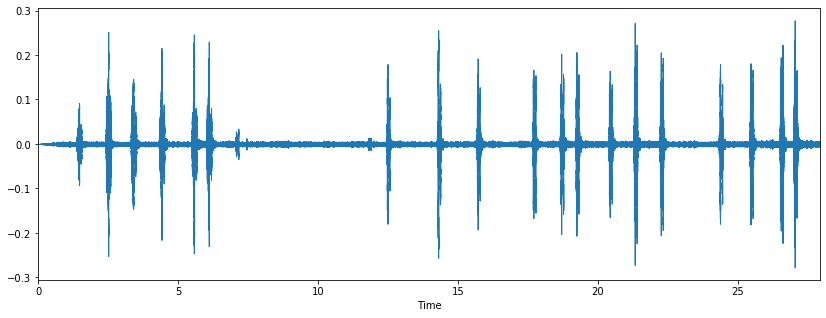

In [13]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

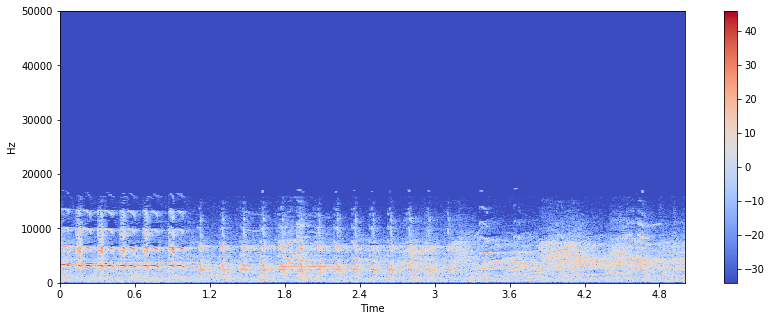

In [11]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

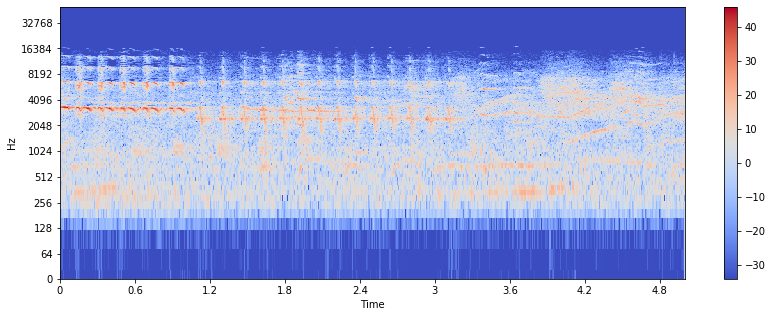

In [12]:
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

In [11]:
import numpy as np
import librosa as lr

In [13]:
##create a timeline 
audio , sfreq = lr.load(audio_fpath + audio_clips[1])
time = np.arange(0, len(audio)) / sfreq 
time , sfreq

(array([0.00000000e+00, 4.53514739e-05, 9.07029478e-05, ...,
        1.97258957e+01, 1.97259410e+01, 1.97259864e+01]), 22050)

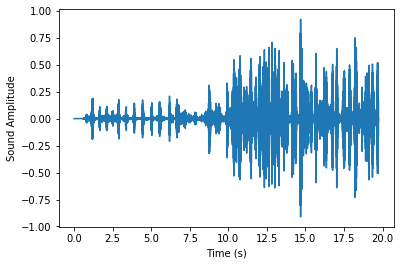

In [14]:
fig , ax = plt.subplots()
ax.plot(time,audio)
ax.set(xlabel = 'Time (s)',ylabel = 'Sound Amplitude')
plt.show()

# The  Metadata Preprocessing

In [1]:
import pandas as pd
import numpy as np
import os 

In [2]:
##Importing the data
data = pd.read_csv('.\AllBirdsv4.csv') 

In [3]:
data.head()

,File ID,English_name,Vocalization_type,Quality,Time,Date,X,Y
0,402254,Rose-crested Blue Pipit,call,no score,13:30,2/8/2018,49,63
1,406171,Rose-crested Blue Pipit,call,A,7:48,6/7/2017,125,133
2,405901,Rose-crested Blue Pipit,call,A,12:00,2/8/2018,58,76
3,405548,Rose-crested Blue Pipit,song,A,11:00,3/10/2018,55,125
4,401782,Rose-crested Blue Pipit,song,A,6:00,6/29/2008,129,123


In [4]:
data.Vocalization_type.unique()

array(['call', 'song', 'Song', 'call, song', '?', 'Call', 'Call, song',
       ' call', 'scold', 'drumming', 'bill-snapping'], dtype=object)

In [5]:
###Do the necessary replacing 
data['Vocalization_type'].replace(['Song','?','Call',' call'],['song','na','call','call'],inplace = True)

In [6]:
###Drop the unecessary entries
data = data[data.Vocalization_type != 'scold']
data = data[data.Vocalization_type != 'na']
data = data[data.Vocalization_type != 'Call, song']
data = data[data.Vocalization_type != 'bill-snapping']
data = data[data.Vocalization_type != 'drumming']
data = data[data.Vocalization_type != 'call, song']


In [7]:
data.Vocalization_type.unique()

array(['call', 'song'], dtype=object)

In [8]:
df = data.loc[data['English_name'] ==  "Rose-crested Blue Pipit" ] ###filter a dataframe for a specific col-name

In [9]:
df.head()

,File ID,English_name,Vocalization_type,Quality,Time,Date,X,Y
0,402254,Rose-crested Blue Pipit,call,no score,13:30,2/8/2018,49,63
1,406171,Rose-crested Blue Pipit,call,A,7:48,6/7/2017,125,133
2,405901,Rose-crested Blue Pipit,call,A,12:00,2/8/2018,58,76
3,405548,Rose-crested Blue Pipit,song,A,11:00,3/10/2018,55,125
4,401782,Rose-crested Blue Pipit,song,A,6:00,6/29/2008,129,123


In [10]:
####get only  a calls data-frame  
df.loc[df['Vocalization_type'] ==  "call" ]

,File ID,English_name,Vocalization_type,Quality,Time,Date,X,Y
0,402254,Rose-crested Blue Pipit,call,no score,13:30,2/8/2018,49,63
1,406171,Rose-crested Blue Pipit,call,A,7:48,6/7/2017,125,133
2,405901,Rose-crested Blue Pipit,call,A,12:00,2/8/2018,58,76
5,401720,Rose-crested Blue Pipit,call,A,13:00,12/28/2016,132,121
6,401719,Rose-crested Blue Pipit,call,A,13:00,12/28/2016,106,107
...,...,...,...,...,...,...,...,...
167,169033,Rose-crested Blue Pipit,call,C,10:00,9/9/2011,125,122
170,150457,Rose-crested Blue Pipit,call,C,9:00,10/13/2013,161,141
173,111777,Rose-crested Blue Pipit,call,C,10.34am,10/22/2012,127,117
175,91845,Rose-crested Blue Pipit,call,C,8:00,12/1/2011,132,150


# About renaming the files

What i want to do is to filter the data frame WRT the bird kind then filter it again WRT to Bird/Call then get an array from the file ID, which i will later compare(Set an IF Statement) with another array :=bird_Id generated by spliting my files to "Bird, nbird, bird_Id". 
Then i did run a loop over my Files and rename them depending whether my bird_Id is in my first array or not!  

# #  Here i want to filter the dataframe corresponding to lesser and run a condition on the file ID

In [11]:
df1 = data.loc[data['English_name'] ==  "Lesser Birchbeere" ] ###filter a dataframe for a specific col-name

In [12]:
df1

,File ID,English_name,Vocalization_type,Quality,Time,Date,X,Y
935,386100,Lesser Birchbeere,call,no score,13:13,5/19/2017,148,105
936,361296,Lesser Birchbeere,call,no score,9:00,3/25/2017,92,33
937,293867,Lesser Birchbeere,call,no score,23:00,6/8/2015,77,59
938,393734,Lesser Birchbeere,call,A,7:10,6/24/2017,47,114
939,389973,Lesser Birchbeere,call,A,11:30,4/27/2016,152,106
...,...,...,...,...,...,...,...,...
1080,11721,Lesser Birchbeere,call,C,6:00,7/20/2006,64,60
1081,1148,Lesser Birchbeere,call,C,?,6/20/1991,68,67
1082,281905,Lesser Birchbeere,call,D,16:30,9/18/2015,52,141
1083,129365,Lesser Birchbeere,call,D,9:30,10/14/2000,151,109


In [13]:
####get only  a calls data-frame  
df2 = df1.loc[df1['Vocalization_type'] ==  "call" ]
df2

,File ID,English_name,Vocalization_type,Quality,Time,Date,X,Y
935,386100,Lesser Birchbeere,call,no score,13:13,5/19/2017,148,105
936,361296,Lesser Birchbeere,call,no score,9:00,3/25/2017,92,33
937,293867,Lesser Birchbeere,call,no score,23:00,6/8/2015,77,59
938,393734,Lesser Birchbeere,call,A,7:10,6/24/2017,47,114
939,389973,Lesser Birchbeere,call,A,11:30,4/27/2016,152,106
...,...,...,...,...,...,...,...,...
1080,11721,Lesser Birchbeere,call,C,6:00,7/20/2006,64,60
1081,1148,Lesser Birchbeere,call,C,?,6/20/1991,68,67
1082,281905,Lesser Birchbeere,call,D,16:30,9/18/2015,52,141
1083,129365,Lesser Birchbeere,call,D,9:30,10/14/2000,151,109


In [14]:
df3 = df1.loc[df1['Vocalization_type'] ==  "song" ]
df3

,File ID,English_name,Vocalization_type,Quality,Time,Date,X,Y
1015,173551,Lesser Birchbeere,song,B,13:00,5/14/2012,72,55
1054,81078,Lesser Birchbeere,song,B,7:00am,6/8/2011,124,77
1064,398883,Lesser Birchbeere,song,C,12:03,12/30/2017,85,51
1078,56420,Lesser Birchbeere,song,C,11:00am,5/3/2008,78,50


In [15]:
arr = np.array(df2['File ID']) ###generate an array of Id´s corresponding to df2 ie : dataframe with call

In [16]:
arr

array([386100, 361296, 293867, 393734, 389973, 388612, 385127, 371803,
       364150, 357666, 357658, 352547, 343848, 336335, 323533, 322772,
       321767, 320102, 318822, 316533, 302410, 302409, 293298, 257563,
       253361, 251993, 220905, 212929, 197938, 183593, 173884, 172489,
       169205, 169204, 169203, 169202, 169196, 164564, 161306, 160794,
       160500, 160493, 160339, 160035, 149942, 110105, 109316,  76499,
        59951,  52440,  47217,  42584,  34862,  34783,  34782,  29509,
       406225, 398815, 388615, 388613, 377861, 377860, 357662, 329010,
       323534, 318018, 312747, 312712, 234990, 220910, 220909, 220908,
       220907, 210719, 204242, 190805, 181058, 177796, 173992, 173541,
       172443, 170706, 169201, 169200, 169198, 165080, 164630, 160790,
       160323, 160294, 160292, 159950, 159404, 153027, 148697, 147349,
       143721, 139866, 139847, 138711, 129073, 128235, 128228, 105256,
       103966, 103965, 103452, 102212,  97354,  95725,  95724,  95723,
      

In [18]:
import os 
import numpy as np
os.chdir('/Users/aminea95/Lesser-wav/LE') ##change the directory 
# !!! Remember when u change here the directory it may occur that the read_csv file wouldnt be able to read so put the csv in the new directory. 
print(os.getcwd()) ##print the path 

C:\Users\aminea95\Lesser-wav\LE


In [21]:
os.path.splitext(f)

('Lesser-Birchbeere-98204', '.wav')

In [182]:
file_name.split('-')

['Lesser', 'Birchbeere', '173551']

In [183]:
os.listdir()

['Lesser-Birchbeere-128228.wav',
 'Lesser-Birchbeere-128235.wav',
 'Lesser-Birchbeere-129073.wav',
 'Lesser-Birchbeere-173551.wav']

In [185]:
bird_Id

'173551'

In [20]:
for f in os.listdir():
    file_name,ext = os.path.splitext(f) ### split the file_name in the fashion ('Lesser-Birchbeere-173551', '.wav')  
    Bird, nbird, bird_Id = file_name.split('-') #### Put the file_name in this shape: ['Bird', 'nbird', 'bird_Id']
    ###so for each file do this division
    if int(bird_Id) in arr: ##and check whether its bird_Id in the array of call
        new_name = '{}-{}-{}{}'.format(Bird +'-call',nbird,bird_Id,ext) ##if yes rename it in a way where u add call "Put call after ID"
    else:
        new_name = '{}-{}-{}{}'.format(Bird +'-song',nbird,bird_Id,ext) ##else u add song
    
    print(new_name) 
    os.rename(f, new_name) ###  rename the file     

Lesser-call-Birchbeere-102212.wav
Lesser-call-Birchbeere-103452.wav
Lesser-call-Birchbeere-103965.wav
Lesser-call-Birchbeere-103966.wav
Lesser-call-Birchbeere-105256.wav
Lesser-call-Birchbeere-109316.wav
Lesser-call-Birchbeere-110105.wav
Lesser-call-Birchbeere-1148.wav
Lesser-call-Birchbeere-11721.wav
Lesser-call-Birchbeere-128228.wav
Lesser-call-Birchbeere-128235.wav
Lesser-call-Birchbeere-129073.wav
Lesser-call-Birchbeere-129365.wav
Lesser-call-Birchbeere-138333.wav
Lesser-call-Birchbeere-138711.wav
Lesser-call-Birchbeere-139847.wav
Lesser-call-Birchbeere-139866.wav
Lesser-call-Birchbeere-143640.wav
Lesser-call-Birchbeere-143721.wav
Lesser-call-Birchbeere-147349.wav
Lesser-call-Birchbeere-148697.wav
Lesser-call-Birchbeere-149942.wav
Lesser-call-Birchbeere-152344.wav
Lesser-call-Birchbeere-153027.wav
Lesser-call-Birchbeere-154791.wav
Lesser-call-Birchbeere-159404.wav
Lesser-call-Birchbeere-159950.wav
Lesser-call-Birchbeere-160035.wav
Lesser-call-Birchbeere-160292.wav
Lesser-call-Birch

# For Darkwing Sparrow	

In [25]:
d1 = data.loc[data['English_name'] ==  "Darkwing Sparrow" ] ###filter a dataframe for a specific col-name
d1

,File ID,English_name,Vocalization_type,Quality,Time,Date,X,Y
673,405293,Darkwing Sparrow,song,A,6:53,4/17/2017,63,81
674,405292,Darkwing Sparrow,song,A,6:51,4/17/2017,37,74
675,405237,Darkwing Sparrow,song,A,8:29,4/8/2017,40,56
676,405192,Darkwing Sparrow,song,A,5:57,4/18/2017,41,66
677,404159,Darkwing Sparrow,call,A,13:00,1/27/2018,12,136
...,...,...,...,...,...,...,...,...
752,210466,Darkwing Sparrow,song,A,15:00,1/17/2015,73,151
753,209059,Darkwing Sparrow,song,A,6:44,5/1/2014,58,160
754,208395,Darkwing Sparrow,call,A,15:17,4/16/2014,56,153
755,197467,Darkwing Sparrow,call,A,13:49,7/28/2014,78,148


In [27]:
d1 = d1.loc[d1['Vocalization_type'] ==  "song" ] ### Dataframe with songs only--->Darkwing Sparrow 
d1


,File ID,English_name,Vocalization_type,Quality,Time,Date,X,Y
673,405293,Darkwing Sparrow,song,A,6:53,4/17/2017,63,81
674,405292,Darkwing Sparrow,song,A,6:51,4/17/2017,37,74
675,405237,Darkwing Sparrow,song,A,8:29,4/8/2017,40,56
676,405192,Darkwing Sparrow,song,A,5:57,4/18/2017,41,66
683,400941,Darkwing Sparrow,song,A,11:30,1/4/2018,140,150
689,388296,Darkwing Sparrow,song,A,5:30,9/30/2017,78,136
690,388295,Darkwing Sparrow,song,A,6:00,9/30/2017,39,56
692,384567,Darkwing Sparrow,song,A,6:17,4/14/2017,71,139
696,383538,Darkwing Sparrow,song,A,14:50,1/25/2017,138,118
706,377232,Darkwing Sparrow,song,A,7:11,3/3/2017,41,64


In [28]:
arr1 = np.array(d1['File ID'])
arr1

array([405293, 405292, 405237, 405192, 400941, 388296, 388295, 384567,
       383538, 377232, 351547, 349815, 349814, 344330, 344328, 325716,
       281739, 281738, 253313, 245732, 240216, 240215, 210466, 209059],
      dtype=int64)

In [29]:
import os 
import numpy as np
os.chdir('/Users/aminea95/Lesser-wav/DA') ##change the directory 
# !!! Remember when u change here the directory it may occur that the read_csv file wouldnt be able to read so put the csv in the new directory. 
print(os.getcwd()) ##print the path 

C:\Users\aminea95\Lesser-wav\DA


In [30]:
for f in os.listdir():
    file_name,ext = os.path.splitext(f) ### split the file_name in the fashion ('Darkwing Sparrow-....'.wav')  
    Bird, nbird, bird_Id = file_name.split('-') #### Put the file_name in this shape: ['Bird', 'nbird', 'bird_Id']
    ###so for each file do this division
    if int(bird_Id) in arr1: ##and check whether its bird_Id in the array of call
        new_name = '{}-{}-{}{}'.format(Bird +'-call',nbird,bird_Id,ext) ##if yes rename it in a way where u add call 
    else:
        new_name = '{}-{}-{}{}'.format(Bird +'-song',nbird,bird_Id,ext) ##else u add song
    
    print(new_name) 
    os.rename(f, new_name) ###  rename the file     

Darkwing-song-Sparrow-192305.wav
Darkwing-song-Sparrow-192306.wav
Darkwing-song-Sparrow-194222.wav
Darkwing-song-Sparrow-197467.wav
Darkwing-song-Sparrow-208395.wav
Darkwing-call-Sparrow-209059.wav
Darkwing-call-Sparrow-210466.wav
Darkwing-song-Sparrow-210486.wav
Darkwing-song-Sparrow-213467.wav
Darkwing-song-Sparrow-215043.wav
Darkwing-song-Sparrow-233433.wav
Darkwing-song-Sparrow-236476.wav
Darkwing-song-Sparrow-236834.wav
Darkwing-song-Sparrow-237289.wav
Darkwing-song-Sparrow-237290.wav
Darkwing-song-Sparrow-239375.wav
Darkwing-call-Sparrow-240215.wav
Darkwing-call-Sparrow-240216.wav
Darkwing-call-Sparrow-245732.wav
Darkwing-song-Sparrow-246976.wav
Darkwing-call-Sparrow-253313.wav
Darkwing-song-Sparrow-264941.wav
Darkwing-call-Sparrow-281738.wav
Darkwing-call-Sparrow-281739.wav
Darkwing-song-Sparrow-281740.wav
Darkwing-song-Sparrow-303718.wav
Darkwing-song-Sparrow-324840.wav
Darkwing-song-Sparrow-325709.wav
Darkwing-call-Sparrow-325716.wav
Darkwing-song-Sparrow-327002.wav
Darkwing-s

# For Green-Tipped-Scarlet-Pipit-

In [110]:
d_1 = data.loc[data['English_name'] ==  "Green-tipped Scarlet Pipit" ] ###filter a dataframe for a specific col-name
d_1

,File ID,English_name,Vocalization_type,Quality,Time,Date,X,Y
847,389469,Green-tipped Scarlet Pipit,song,no score,7:30,3/22/2014,64,70
848,389129,Green-tipped Scarlet Pipit,song,no score,6:30,10/28/2014,35,61
849,359165,Green-tipped Scarlet Pipit,song,no score,8:30,3/11/2017,75,151
850,312884,Green-tipped Scarlet Pipit,song,no score,10:30,4/16/2016,69,149
851,299610,Green-tipped Scarlet Pipit,song,no score,6:30,7/21/2011,141,45
...,...,...,...,...,...,...,...,...
930,128416,Green-tipped Scarlet Pipit,song,C,8:30,6/6/2010,145,27
931,23802,Green-tipped Scarlet Pipit,song,C,?,9/24/2008,35,147
932,18985,Green-tipped Scarlet Pipit,song,C,am,4/11/2008,26,138
933,350,Green-tipped Scarlet Pipit,song,C,?,2002-06-00,27,147


In [111]:
d_1 = d_1.loc[d_1['Vocalization_type'] ==  "song" ] ### Dataframe with songs only--->Green-tipped...
d_1


,File ID,English_name,Vocalization_type,Quality,Time,Date,X,Y
847,389469,Green-tipped Scarlet Pipit,song,no score,7:30,3/22/2014,64,70
848,389129,Green-tipped Scarlet Pipit,song,no score,6:30,10/28/2014,35,61
849,359165,Green-tipped Scarlet Pipit,song,no score,8:30,3/11/2017,75,151
850,312884,Green-tipped Scarlet Pipit,song,no score,10:30,4/16/2016,69,149
851,299610,Green-tipped Scarlet Pipit,song,no score,6:30,7/21/2011,141,45
...,...,...,...,...,...,...,...,...
929,194468,Green-tipped Scarlet Pipit,song,C,?,2003-11-00,77,118
930,128416,Green-tipped Scarlet Pipit,song,C,8:30,6/6/2010,145,27
931,23802,Green-tipped Scarlet Pipit,song,C,?,9/24/2008,35,147
932,18985,Green-tipped Scarlet Pipit,song,C,am,4/11/2008,26,138


In [35]:
arr2 = np.array(d_1['File ID'])
arr2

array([389469, 389129, 359165, 312884, 299610, 299158, 299147, 286369,
       278068, 234763, 358825, 340294, 319588, 283151, 283150, 268894,
       241793, 221676, 221675, 221674, 221673, 210152, 206678, 205977,
       196407, 187193, 174492, 170248, 144004, 143234, 142719, 115450,
        77917,  62671,  62446,  60257,  60256,  60255,  49063,  49062,
        46755,  42405,  36909,  23803,  21819,  17578,   4018, 403198,
       396419, 388441, 388119, 387945, 385715, 290233, 244251, 194469,
       173336, 158748, 154345, 145503, 141683, 115916,  72980,  70075,
        52794,  50496,  50495,  23805,  22520,  11825,  11743,   8176,
         4598, 194468, 128416,  23802,  18985,    350], dtype=int64)

In [112]:
import os 
import numpy as np
os.chdir('/Users/aminea95/Lesser-wav/GT') ##change the directory 
# !!! Remember when u change here the directory it may occur that the read_csv file wouldnt be able to read so put the csv in the new directory. 
print(os.getcwd()) ##print the path 

C:\Users\aminea95\Lesser-wav\GT


In [113]:
for f in os.listdir():
    file_name,ext = os.path.splitext(f) ### split the file_name in the fashion ('Darkwing Sparrow-....'.wav')  
    file_name.split('-')
    

In [114]:
file_name.split('-')

['Green', 'Tipped', 'Scarlet', 'Pipit', '8176']

In [115]:
 for f in os.listdir():
    file_name,ext = os.path.splitext(f) ### split the file_name in the fashion ('Darkwing Sparrow-....'.wav')  
    Bird, nbird, nbird1, nbird2, bird_Id = file_name.split('-') #### Put the file_name in this shape: ['Bird', 'nbird', 'bird_Id']
    ###so for each file do this division
    if int(bird_Id) in arr2: ##and check whether its bird_Id in the array of call
        new_name = '{}-{}-{}-{}-{}{}'.format(Bird +'-call',nbird,nbird1,nbird2,bird_Id,ext) ##'{}-{}-{}-{}{}' the last bracket for extension 
                                                                                         ###if yes rename it in a way where u add call 
    else:
        new_name = '{}-{}-{}-{}-{}{}'.format(Bird +'-song',nbird,nbird1,nbird2,bird_Id,ext) ##else u add song
    
    print(new_name) 
    os.rename(f, new_name) ###  rename the file     

Green-song-Tipped-Scarlet-Pipit-110826.wav
Green-song-Tipped-Scarlet-Pipit-11415.wav
Green-call-Tipped-Scarlet-Pipit-115450.wav
Green-call-Tipped-Scarlet-Pipit-115916.wav
Green-call-Tipped-Scarlet-Pipit-11743.wav
Green-call-Tipped-Scarlet-Pipit-11825.wav
Green-call-Tipped-Scarlet-Pipit-128416.wav
Green-call-Tipped-Scarlet-Pipit-141683.wav
Green-call-Tipped-Scarlet-Pipit-142719.wav
Green-call-Tipped-Scarlet-Pipit-143234.wav
Green-call-Tipped-Scarlet-Pipit-144004.wav
Green-call-Tipped-Scarlet-Pipit-145503.wav
Green-song-Tipped-Scarlet-Pipit-14729.wav
Green-call-Tipped-Scarlet-Pipit-154345.wav
Green-song-Tipped-Scarlet-Pipit-15832.wav
Green-call-Tipped-Scarlet-Pipit-158748.wav
Green-call-Tipped-Scarlet-Pipit-170248.wav
Green-call-Tipped-Scarlet-Pipit-173336.wav
Green-call-Tipped-Scarlet-Pipit-174492.wav
Green-song-Tipped-Scarlet-Pipit-174547.wav
Green-call-Tipped-Scarlet-Pipit-17578.wav
Green-call-Tipped-Scarlet-Pipit-187193.wav
Green-call-Tipped-Scarlet-Pipit-18985.wav
Green-call-Tipped-